### Josh Cubero
### DS-600 
### Final Project - Phase 2 & 3 Code

In [75]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
full_data = pd.read_csv('creditcard_2023.csv')

This block of code is checking to see if there are any null values and that each feature has uniform datatypes.

In [3]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

Here, we're checking to the min and max values to identify the need for scaling the data. At first glance, the data will need to be scaled.

In [4]:
full_data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,2.076882e-12,-3.248204e-12,-3.636929e-12,3.879536e-12,2.409066e-13,2.768028e-12,-9.496329e-14,2.831363e-12,-2.488498e-12,...,-3.358969e-13,-2.163216e-13,2.562302e-12,-4.924404e-14,-2.931602e-12,4.378988e-13,-1.661857e-12,-2.416333e-12,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528580e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590122e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [5]:
full_data.drop('id', inplace=True, axis=1)

In [6]:
full_data['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [7]:
full_data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,-0.513556,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [8]:
full_data = full_data.sample(frac=1).reset_index(drop=True)
full_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.287314,-0.716400,-0.461131,1.090119,-0.620039,0.995647,1.243737,-0.063665,-0.963532,0.117447,...,0.351293,0.471469,2.132999,-0.055555,0.716001,0.830144,-0.392676,-0.092206,13990.12,1
1,1.622557,-0.705413,0.352271,-0.426065,-0.081719,0.151125,0.222896,-0.151419,1.540784,0.596793,...,-0.009610,0.693210,0.087231,0.105443,-0.600177,1.525249,-0.283848,-0.205879,7035.96,0
2,0.863823,-0.637218,1.981471,-0.013296,-0.234351,0.979012,0.045716,-0.023700,1.801098,0.489384,...,-0.051618,0.799035,-0.190321,0.808940,0.829518,-0.291358,-0.099376,-0.027576,5173.43,0
3,0.973012,0.286770,-0.695722,1.012012,0.782316,-0.309516,0.095659,-0.057737,-0.719959,-0.275939,...,-0.004420,-0.450566,-0.115402,0.119997,0.659732,0.367651,0.326292,0.547309,12748.69,1
4,-0.185469,-0.025653,1.359578,-0.239767,0.198452,0.719317,0.377915,-0.018938,1.178648,0.437744,...,-0.183371,-0.383300,-0.085837,-0.883203,-0.608924,-2.044492,-0.208578,0.229022,3458.59,0


Since the dataset is so large, I'm going to divide the dataset into three parts: 1 for EDA, 1 for train-test and evaluate for predictive analytics, and 1 for validating the predictive model on unseen data.

In [9]:
explore_data, remaining_data = train_test_split(full_data, test_size=0.7, random_state=42)
train_test_data, val_data = train_test_split(remaining_data, test_size=0.2857, random_state=42)
len(explore_data), len(train_test_data), len(val_data)

(170589, 284320, 113721)

In [10]:
df_explore = explore_data.drop('Class', axis=1)
df_explore_target = explore_data['Class']

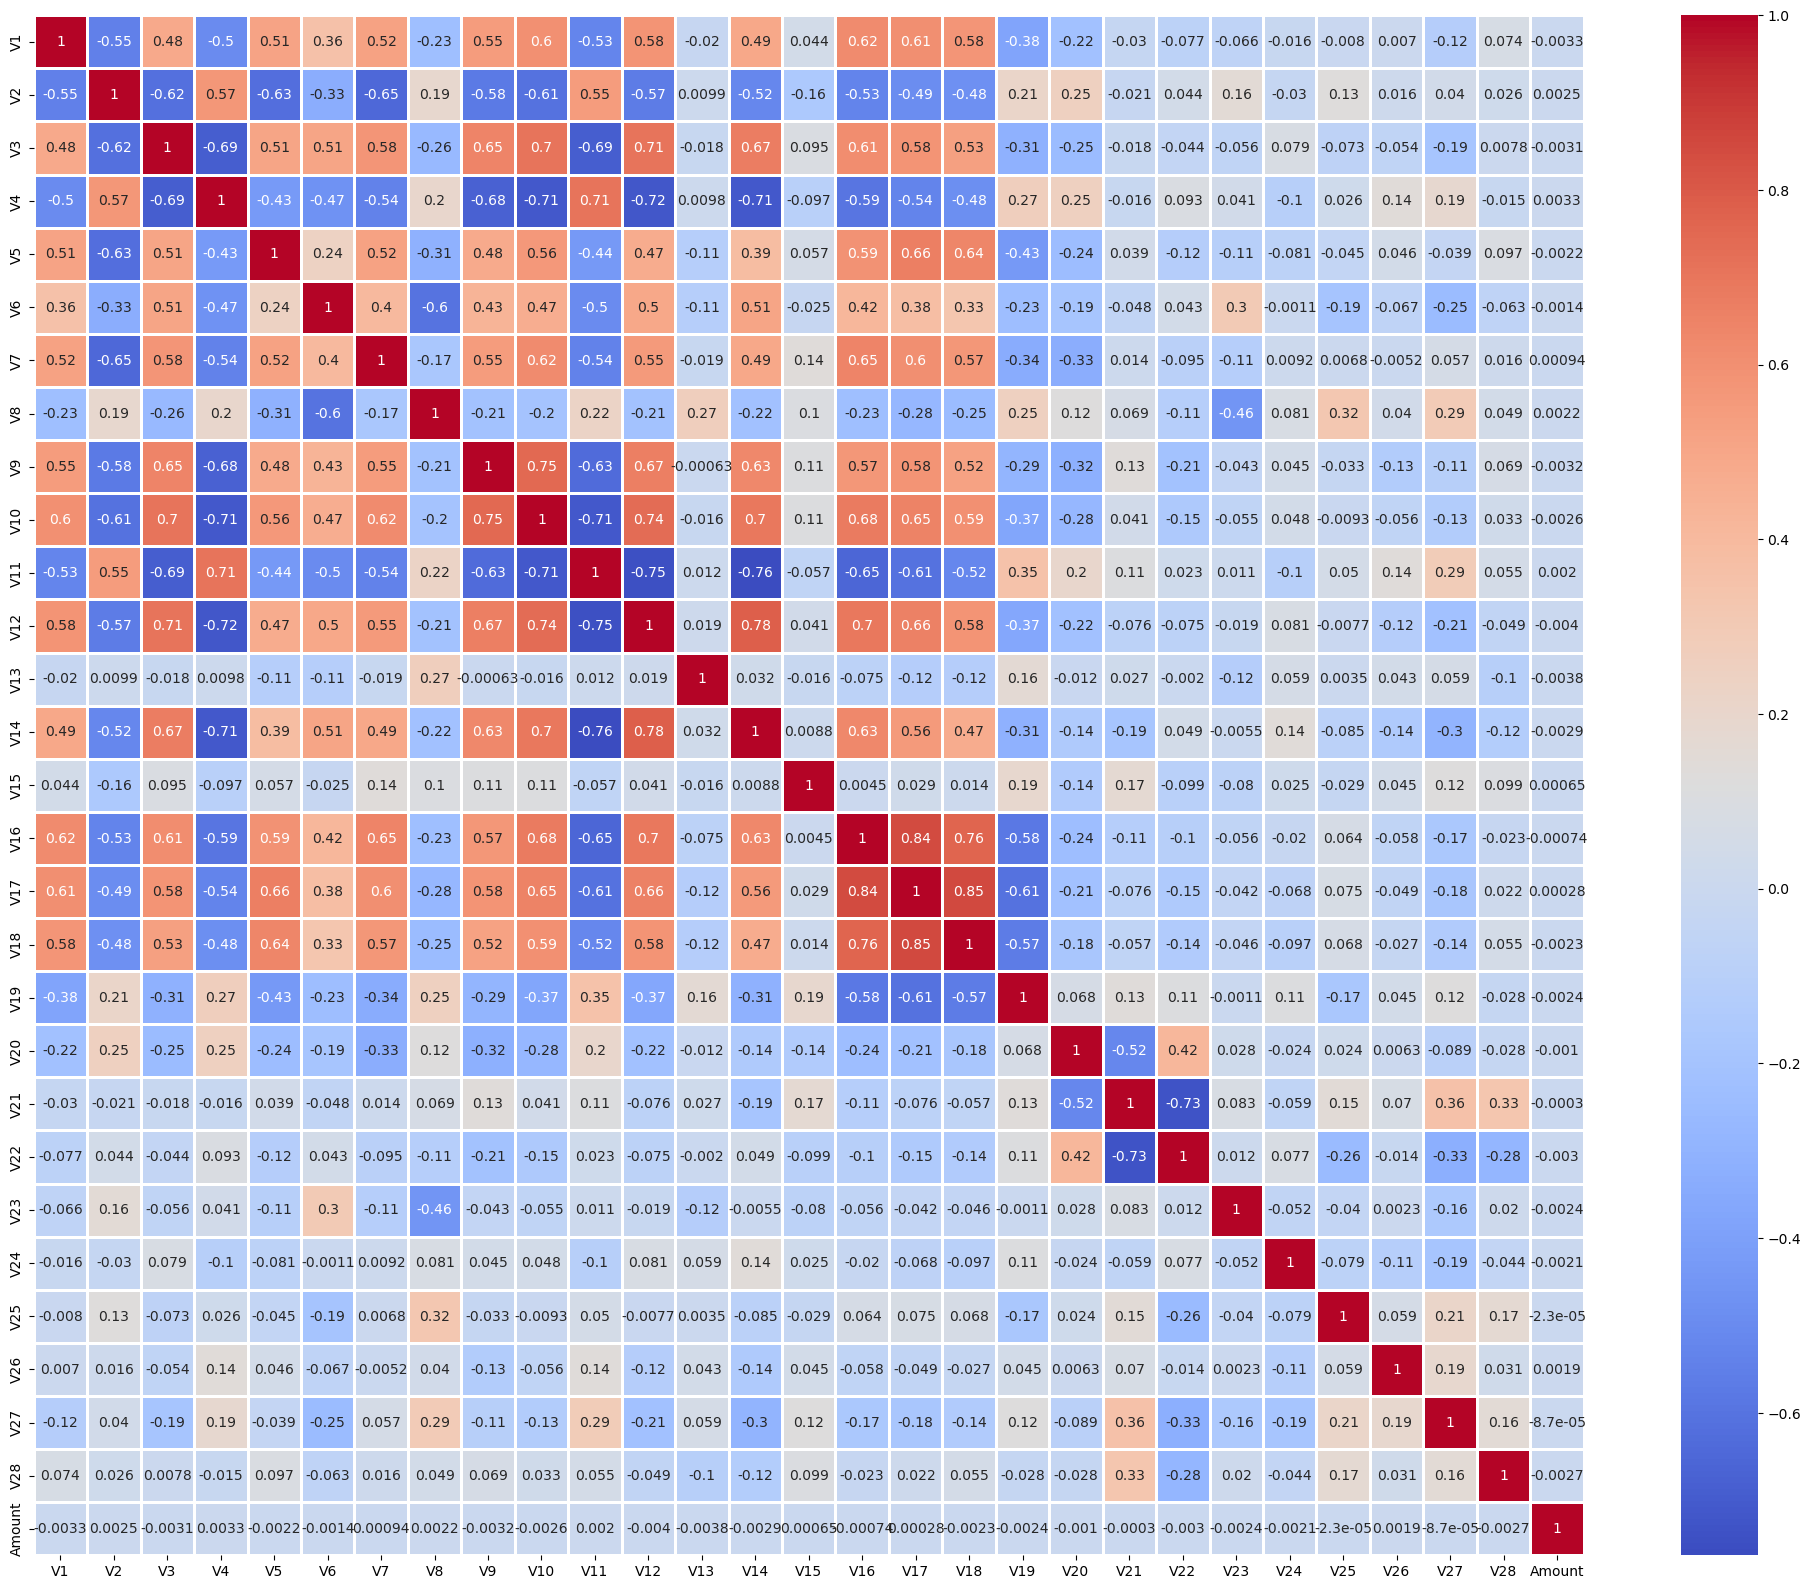

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(25,20)
sns.heatmap(df_explore.corr(), cmap='coolwarm', ax=ax, annot=True, linewidths=2)
plt.show()

In [111]:
df_explore.corr().head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1.000000,-0.549163,0.483960,-0.498064,0.511427,0.355803,0.521240,-0.228287,0.545916,0.596602,...,-0.216750,-0.030409,-0.077450,-0.065812,-0.016467,-0.008020,0.007021,-0.122086,0.074367,-0.003256
V2,-0.549163,1.000000,-0.618442,0.568291,-0.625214,-0.333424,-0.647020,0.191658,-0.576244,-0.608990,...,0.254919,-0.021249,0.043909,0.156529,-0.030265,0.132204,0.016078,0.040222,0.026270,0.002456
V3,0.483960,-0.618442,1.000000,-0.688018,0.508185,0.506817,0.578107,-0.264456,0.647252,0.704140,...,-0.249052,-0.018052,-0.044404,-0.056268,0.079083,-0.072688,-0.054047,-0.187490,0.007822,-0.003127
V4,-0.498064,0.568291,-0.688018,1.000000,-0.427121,-0.472878,-0.536297,0.198285,-0.676345,-0.710790,...,0.253022,-0.016234,0.092727,0.040671,-0.104164,0.025710,0.139505,0.186914,-0.015157,0.003256
V5,0.511427,-0.625214,0.508185,-0.427121,1.000000,0.236151,0.524295,-0.312960,0.477446,0.559913,...,-0.240388,0.038511,-0.121276,-0.106094,-0.080649,-0.044804,0.046197,-0.039336,0.096959,-0.002162


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_explore_scaled = scaler.fit_transform(df_explore)

In this next block of code, I instantiate a parameterless PCA instance. I execute PCA, then calculate the cumulative sum of the explained variance ratio. I then used the cumulative sum of the explained variance ratio to find the optimal number of PCA components. 

In [13]:
pca = PCA()
components = pca.fit_transform(df_explore_scaled)
pca_df = pd.DataFrame(data = components
             , columns = df_explore.columns)
pca_evr = pca.explained_variance_ratio_
np_pca_evr = np.cumsum(pca_evr)

In [14]:
pca_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-4.284528,-0.204791,0.703207,0.086274,0.623059,1.791527,0.874032,-0.030262,0.023772,-1.474799,...,0.030630,-0.123280,-0.248825,-0.068156,0.394335,-0.129982,-0.255416,-0.038777,-0.396106,-0.079674
1,-4.251759,0.598811,0.724544,0.955748,0.129690,0.244044,0.351846,-1.313897,-0.055793,-1.481073,...,-0.058637,0.142325,-0.383360,0.074939,-0.049166,0.002301,0.040873,0.080790,-0.116073,-0.063441
2,-1.029100,0.446051,-0.649699,-0.508488,-0.318276,-1.383957,-0.013218,0.528221,0.807167,-0.112358,...,-0.152517,-0.446345,-0.109791,-0.139385,0.088689,-0.032378,-0.193980,-0.076467,0.098827,0.277445
3,2.250306,-0.064083,0.530628,0.911984,-0.787249,1.304651,-0.084266,0.051362,0.185201,1.238937,...,1.111966,-0.052478,-0.569396,0.658172,0.102342,-0.318043,-0.212635,0.270188,0.298169,-0.088325
4,2.834127,0.123855,0.622998,0.749669,-0.319763,-0.613223,0.521545,-0.187574,-1.253305,1.167941,...,1.066325,0.001924,-0.251253,-0.899698,-0.325154,0.526684,-0.662786,0.941755,0.823427,0.699064


The chart below depicts the cumulative sum of the explained variance ratio, and through visual inspection we can estimate that the optimal number of components to capture at least 95% of the variance is 21 components.

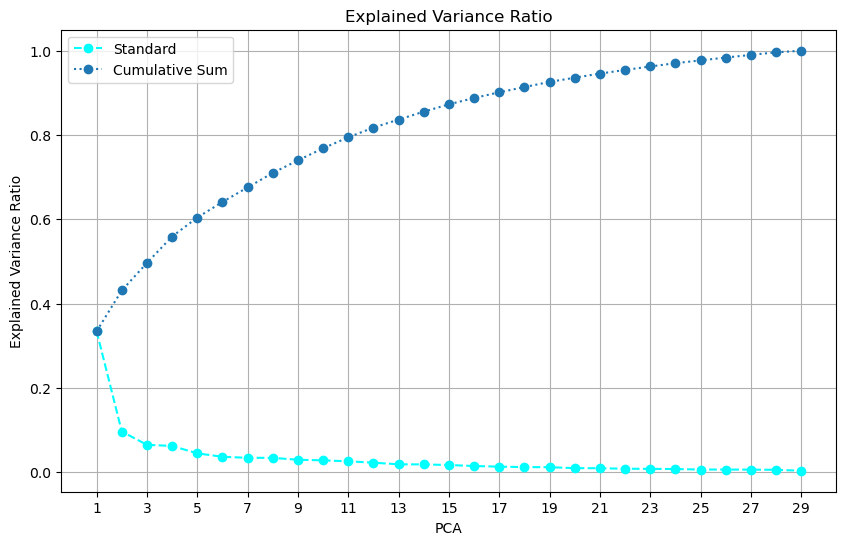

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,30), pca_evr, marker='o', color='cyan', label = 'Standard', linestyle='dashed')
plt.plot(range(1,30), np_pca_evr, label = 'Cumulative Sum', linestyle='dotted',marker='o')
plt.xlabel('PCA')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.xticks(range(1, 30, 2))
plt.legend()
plt.grid(True)
plt.show()

In [16]:
threshold = 0.95
n_components = np.argmax(np_pca_evr >= threshold) 
print(f'Number of components to retain {n_components} to explain at least {threshold*100}% of the variance.')

Number of components to retain 21 to explain at least 95.0% of the variance.


Here, I create a second PCA instance with 21 components.

In [17]:
pca2 = PCA(n_components=21)
components2 = pca2.fit_transform(df_explore_scaled)
pca_df2 = pd.DataFrame(data = components2
             , columns = df_explore.columns[:21])

IN the next block of code, I search for and find the optimal number of clusters using KMeans and the elbow method. It appears 4 clusters is optimal.

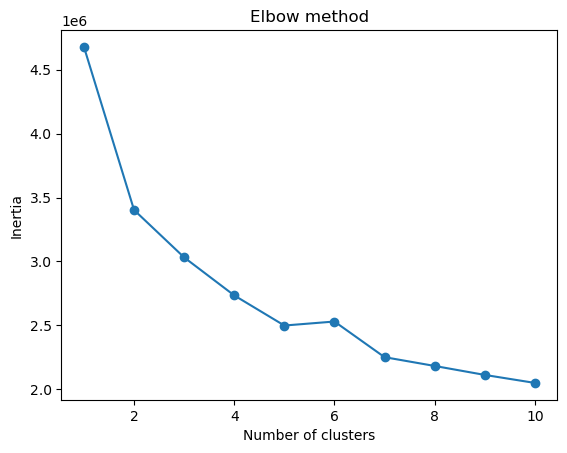

In [18]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=i)
    kmeans.fit(pca_df2)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Below we see that our 4 clusters are working well with the exception of a few outliers.

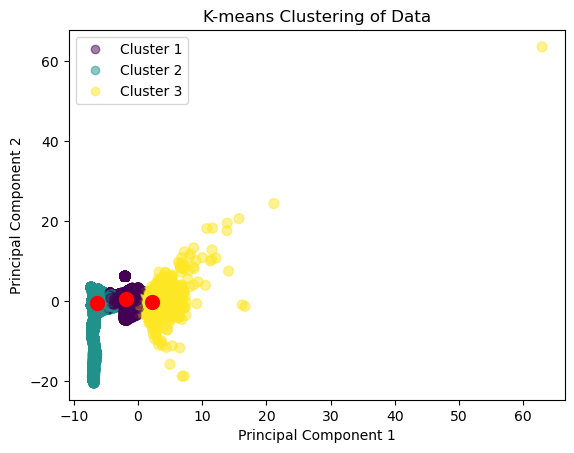

In [102]:
pca_df2_array = pca_df2.to_numpy()  
kmeans = KMeans(n_clusters=3, n_init=3)
kmeans.fit(pca_df2_array)
y_kmeans = kmeans.predict(pca_df2_array)
centers = kmeans.cluster_centers_
scatter = plt.scatter(pca_df2_array[:, 0], pca_df2_array[:, 1], c=y_kmeans, cmap='viridis', label='Cluster', s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, label='Centroids')
plt.title('K-means Clustering of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Centroids'])
plt.show()

In [103]:
from sklearn.metrics import silhouette_score
silhouette_score = silhouette_score(pca_df2_array, kmeans.labels_)
print(silhouette_score)

0.2357620965905621


In [21]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score = davies_bouldin_score(pca_df2_array, kmeans.labels_)
print(davies_bouldin_score)

1.5620702242909252


In the next block of code I implement Elliptic Envelope in search of outliers. I placed the indices of the outliers into an arrary for future use.

In [22]:
from sklearn.covariance import EllipticEnvelope
import numpy as np

envelope = EllipticEnvelope(contamination=0.1) 
envelope.fit(pca_df2_array)
outliers = envelope.predict(pca_df2_array)

n_outliers = np.sum(outliers == -1)
print("Number of outliers:", n_outliers)

outlier_indices = np.where(outliers == -1)[0]
print("Indices of outliers:", outlier_indices)


Number of outliers: 17059
Indices of outliers: [     8      9     16 ... 170567 170575 170579]


I found that there are ~17K outliers in the dataset, and the visual below depicts significant overlap in outliers and inliers.

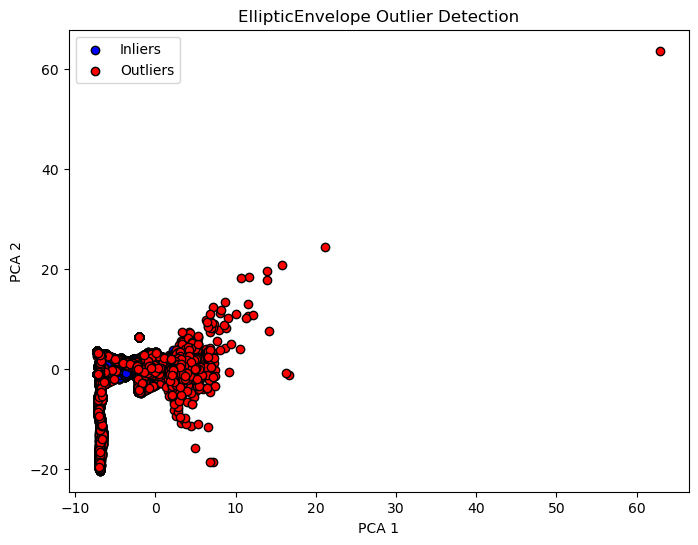

In [26]:
from sklearn.covariance import EllipticEnvelope
envelope = EllipticEnvelope(contamination=0.1) 
envelope.fit(pca_df2_array)
anomaly_scores = envelope.decision_function(pca_df2_array)
threshold = np.percentile(anomaly_scores, 100 * 0.1) 
outliers = pca_df2_array[anomaly_scores < threshold]
inliers = pca_df2_array[anomaly_scores >= threshold]
plt.figure(figsize=(8, 6))
plt.scatter(inliers[:, 0], inliers[:, 1], c='b', label='Inliers', edgecolors='k')
plt.scatter(outliers[:, 0], outliers[:, 1], c='r', label='Outliers', edgecolors='k')
plt.legend()
plt.title('EllipticEnvelope Outlier Detection')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [27]:
mask = np.ones(len(pca_df2_array), dtype=bool)
mask[outlier_indices] = False
pca_df2_array_filtered = pca_df2_array[mask]

### The data at this point has been scaled, dimensionality reduced, and outliers have been removed.
### This procedure will be recreated for the train-test set.

In [28]:
pca_df2_array_filtered.shape

(153530, 21)

In [30]:
pca_df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,-4.284528,-0.204791,0.703207,0.086274,0.623059,1.791527,0.874032,-0.030262,0.023772,-1.474799,...,0.359599,0.217745,-1.201745,0.143454,-0.038115,-0.751265,-0.701318,-0.135051,0.030630,-0.123280
1,-4.251759,0.598811,0.724544,0.955748,0.129690,0.244044,0.351846,-1.313897,-0.055793,-1.481073,...,0.636372,0.599275,-0.263400,0.286200,-0.094559,-0.371690,0.204843,-0.471590,-0.058637,0.142325
2,-1.029100,0.446051,-0.649699,-0.508488,-0.318276,-1.383957,-0.013218,0.528221,0.807167,-0.112358,...,0.159252,0.273499,-0.303834,0.218862,-0.148128,0.137849,0.064459,-0.015934,-0.152517,-0.446345
3,2.250306,-0.064083,0.530628,0.911984,-0.787249,1.304651,-0.084266,0.051362,0.185201,1.238937,...,0.791025,0.832380,0.635809,-0.193909,0.563011,0.344236,0.283272,-0.282217,1.111966,-0.052478
4,2.834127,0.123855,0.622998,0.749669,-0.319763,-0.613223,0.521545,-0.187574,-1.253305,1.167941,...,0.690269,-0.815190,0.257815,1.229904,-1.181370,-0.815025,0.241234,-0.691988,1.066325,0.001924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170584,2.460226,0.658427,0.809101,0.415987,0.105446,0.552170,-0.811046,-0.960242,1.623126,-0.190441,...,-0.625033,0.348633,-0.874839,-0.551663,-0.162788,-0.560888,-0.108930,-0.736025,0.540178,-0.750488
170585,1.983330,0.348680,0.472622,-0.482516,-0.309551,1.101202,0.525357,-1.032676,-0.235123,-0.552632,...,-0.627314,-0.541507,-0.891311,1.249757,0.255743,-0.456446,0.509909,-0.563942,-0.035333,-0.201570
170586,2.582735,0.077819,0.117727,-0.219812,0.093114,0.291030,1.328631,-1.168345,-1.836193,0.800261,...,-0.783520,0.218648,-0.578369,-1.354024,-0.282028,0.695939,0.515821,-0.039880,0.749424,0.077128
170587,2.236475,-0.208080,0.336530,-0.040800,0.260553,0.847623,0.774848,-1.048853,-0.667733,0.515454,...,-0.924091,-0.510514,0.617050,0.371812,0.395238,0.146042,-0.039986,0.131754,-0.079329,-1.003542


In [31]:
final_data = pd.DataFrame(data=pca_df2_array_filtered, columns=pca_df2.columns)
final_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,-4.284528,-0.204791,0.703207,0.086274,0.623059,1.791527,0.874032,-0.030262,0.023772,-1.474799,...,0.359599,0.217745,-1.201745,0.143454,-0.038115,-0.751265,-0.701318,-0.135051,0.030630,-0.123280
1,-4.251759,0.598811,0.724544,0.955748,0.129690,0.244044,0.351846,-1.313897,-0.055793,-1.481073,...,0.636372,0.599275,-0.263400,0.286200,-0.094559,-0.371690,0.204843,-0.471590,-0.058637,0.142325
2,-1.029100,0.446051,-0.649699,-0.508488,-0.318276,-1.383957,-0.013218,0.528221,0.807167,-0.112358,...,0.159252,0.273499,-0.303834,0.218862,-0.148128,0.137849,0.064459,-0.015934,-0.152517,-0.446345
3,2.250306,-0.064083,0.530628,0.911984,-0.787249,1.304651,-0.084266,0.051362,0.185201,1.238937,...,0.791025,0.832380,0.635809,-0.193909,0.563011,0.344236,0.283272,-0.282217,1.111966,-0.052478
4,2.834127,0.123855,0.622998,0.749669,-0.319763,-0.613223,0.521545,-0.187574,-1.253305,1.167941,...,0.690269,-0.815190,0.257815,1.229904,-1.181370,-0.815025,0.241234,-0.691988,1.066325,0.001924


In [47]:
def clean_data(df, n_components=21):    
    X = df.drop('Class', axis=1)
    y = df['Class']
    
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(X)
    
    envelope = EllipticEnvelope()
    envelope.fit(principal_components)
    
    outlier_mask = envelope.predict(principal_components) == -1
    
    cleaned_principal_components = principal_components[~outlier_mask]
    
    cleaned_X = X.iloc[~outlier_mask]
    cleaned_y = y.iloc[~outlier_mask]
    
    cleaned_data = pd.DataFrame(cleaned_principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
    cleaned_data['Class'] = cleaned_y.values
    
    return cleaned_data

In [48]:
train_data = clean_data(train_test_data)
train_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,Class
0,-563.651580,1.782002,-0.978047,-0.466562,0.558555,-0.284980,1.110241,0.412773,-1.196351,-0.656976,...,-0.719465,-0.430210,1.076394,0.122960,1.182658,-0.337000,0.111081,-0.178671,0.736346,0
1,6564.698419,-1.084272,-0.504572,0.397672,1.509670,1.220669,0.948736,-0.754113,1.031425,-0.893151,...,-0.275165,-0.390502,-0.007234,-0.346619,-0.037139,0.411602,0.084075,0.197593,0.020769,1
2,11704.708419,1.996992,-1.305719,0.619795,1.500086,-0.488577,1.621974,0.681455,1.051998,-0.683310,...,-1.068462,-0.105677,0.511532,0.673794,1.284680,-0.157263,0.211000,0.304827,0.798807,0
3,1867.938420,1.594525,-0.037453,-0.155744,-0.543182,0.247215,0.769280,0.126468,-0.604254,-0.277612,...,-0.069596,0.168477,1.226950,-0.844811,0.181170,-0.141872,0.024691,0.075869,0.324472,0
4,-2650.151579,-4.362597,0.962119,-0.796559,0.333056,0.884293,0.965452,-0.297470,-1.009459,-0.138565,...,1.275117,0.082360,0.196644,-0.175604,0.623149,-0.197437,-0.107768,-0.147099,0.023877,1


In [86]:
"""X = train_data.drop('Class', axis=1)
y = train_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)"""

In [119]:
from sklearn.preprocessing import MinMaxScaler

X = train_data.drop('Class', axis=1)
y = train_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
pd.DataFrame(X_train_scaled, columns=X.columns).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,0.481072,0.773727,0.406268,0.710236,0.635988,0.410577,0.434390,0.421905,0.363049,0.710298,...,0.424617,0.500983,0.576034,0.375935,0.528855,0.716073,0.192365,0.503136,0.510023,0.364582
1,0.998689,0.814982,0.470809,0.593422,0.675137,0.456636,0.401084,0.546998,0.308570,0.746595,...,0.471969,0.533864,0.186437,0.412036,0.518719,0.574036,0.146569,0.518595,0.596347,0.370522
2,0.868609,0.011814,0.512128,0.761710,0.819168,0.431895,0.495736,0.626481,0.437818,0.458603,...,0.393400,0.631355,0.423439,0.458675,0.482423,0.548047,0.171821,0.532564,0.405948,0.445109
3,0.969334,0.799529,0.340031,0.543050,0.556990,0.485658,0.474719,0.360089,0.523979,0.607654,...,0.358870,0.297762,0.523006,0.431010,0.684946,0.636239,0.250815,0.512447,0.540053,0.355928
4,0.641605,0.607811,0.444894,0.541526,0.624957,0.592201,0.630616,0.510355,0.436432,0.559123,...,0.507910,0.454920,0.351001,0.427820,0.473172,0.628089,0.300071,0.476870,0.488808,0.415419


In [121]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [122]:
logistic_regression = LogisticRegression()
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [123]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
test_score = grid_search.score(X_test_scaled, y_test)
print("Test Set Accuracy:", test_score)

Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.9603829808021104
Test Set Accuracy: 0.9613310406815428


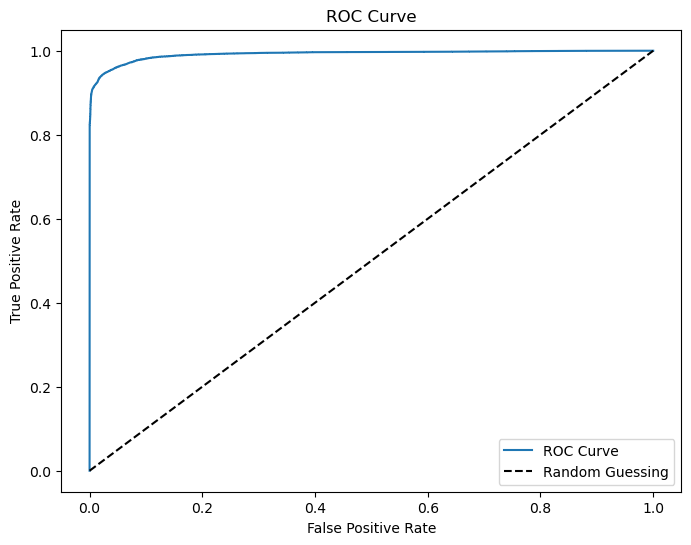

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     27607
           1       0.98      0.94      0.96     23571

    accuracy                           0.96     51178
   macro avg       0.96      0.96      0.96     51178
weighted avg       0.96      0.96      0.96     51178

Confusion Matrix:


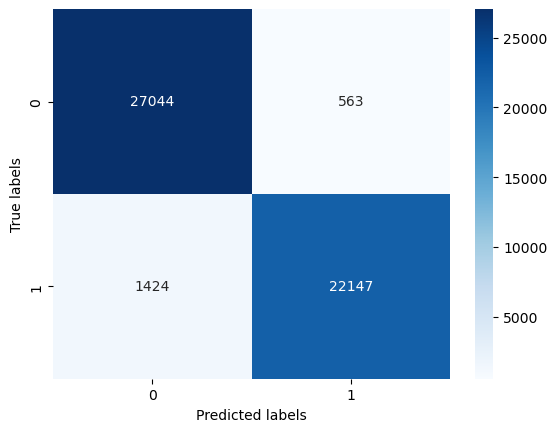

In [124]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix

def train_log_reg(X_train_scaled, y_train, params):
    logistic_regression = LogisticRegression(**params)
    logistic_regression.fit(X_train_scaled, y_train)
    return logistic_regression

def plot_roc_curve(logistic_regression, X_test_scaled, y_test):
    y_pred_proba = logistic_regression.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

def model_performance(logistic_regression, X_test_scaled, y_test):
    y_pred = logistic_regression.predict(X_test_scaled)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

params = {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


logistic_regression = train_log_reg(X_train_scaled, y_train, params)

plot_roc_curve(logistic_regression, X_test_scaled, y_test)

model_performance(logistic_regression, X_test_scaled, y_test)


In [125]:
param_grid = {
    'n_estimators': [100]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid = param_grid,cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Score: 0.9995652386302574
Best Parameters: {'n_estimators': 100}


In [126]:
rf_classifier = RandomForestClassifier(criterion="entropy",n_estimators=200, random_state=101)

rf_classifier.fit(X_train_scaled, y_train)

y_pred = rf_classifier.predict(X_test_scaled)

roc_auc = roc_auc_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("ROC AUC Score:", roc_auc)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

ROC AUC Score: 0.9997795626588247

Accuracy: 0.9997655242487006

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27607
           1       1.00      1.00      1.00     23571

    accuracy                           1.00     51178
   macro avg       1.00      1.00      1.00     51178
weighted avg       1.00      1.00      1.00     51178


Confusion Matrix:
 [[27596    11]
 [    1 23570]]


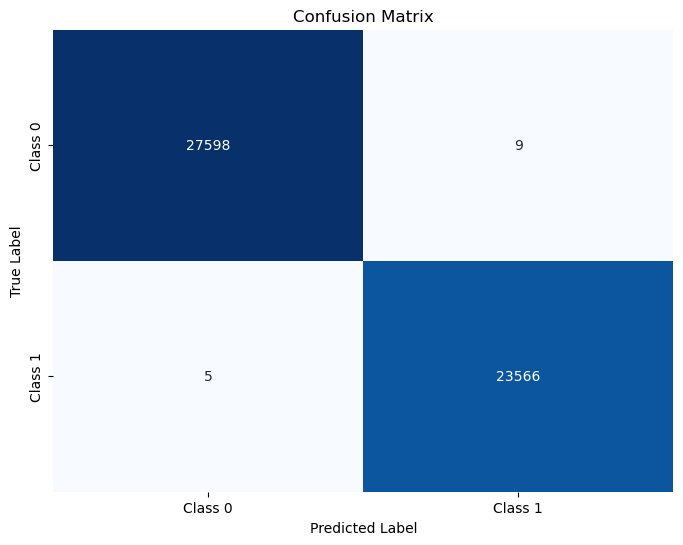

In [78]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


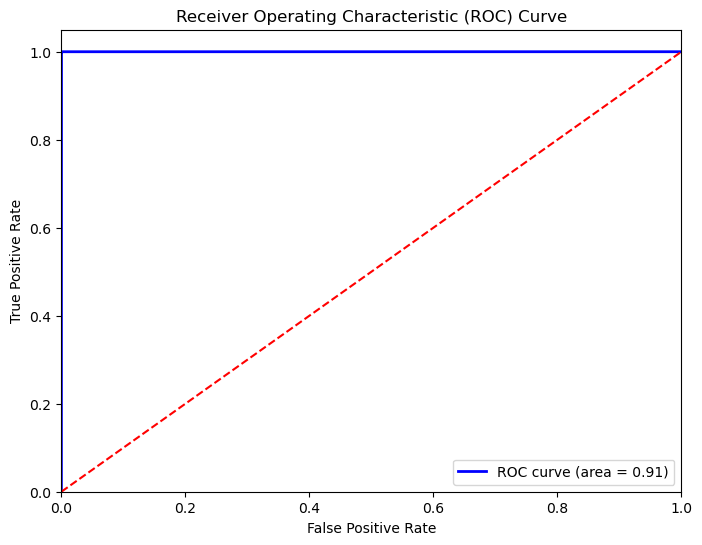

In [139]:
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test_scaled)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [131]:
validation_data = clean_data(val_data) 
X2 = validation_data.drop('Class', axis=1)
y2 = validation_data['Class']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
minScaler = MinMaxScaler()
X_train_scaled2 = minScaler.fit_transform(X_train2)
X_test_scaled2 = minScaler.transform(X_test2)

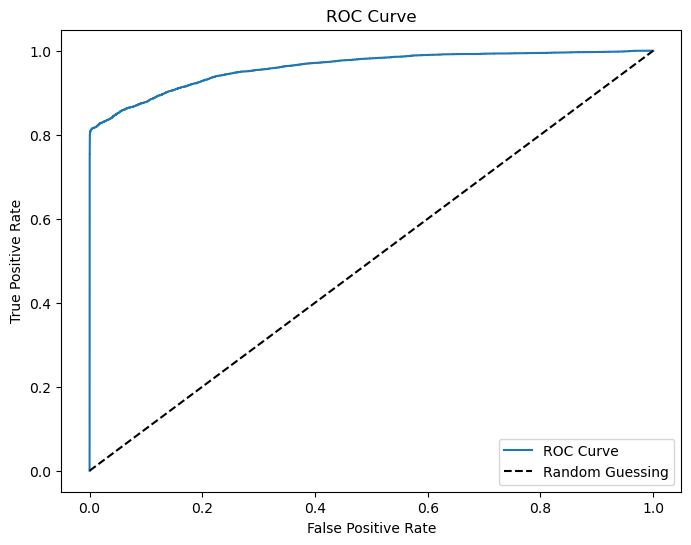

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     11013
           1       0.95      0.84      0.89      9457

    accuracy                           0.91     20470
   macro avg       0.91      0.90      0.90     20470
weighted avg       0.91      0.91      0.90     20470

Confusion Matrix:


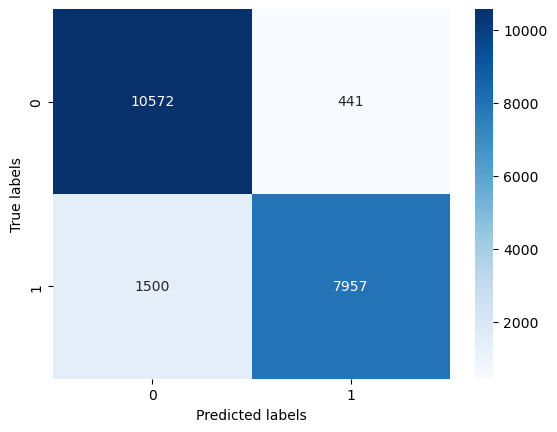

In [140]:
plot_roc_curve(logistic_regression, X_test_scaled2, y_test2)

model_performance(logistic_regression, X_test_scaled2, y_test2)

In [146]:
y_pred_log_reg = logistic_regression.predict(X_test_scaled2)

roc_auc = roc_auc_score(y_test2, y_pred_log_reg )

accuracy = accuracy_score(y_test2, y_pred_log_reg )

classification_rep = classification_report(y_test2, y_pred_log_reg )

conf_matrix = confusion_matrix(y_test2, y_pred_log_reg)

print("ROC AUC Score:", roc_auc)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

ROC AUC Score: 0.9006718736403317

Accuracy: 0.9051783097215437

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     11013
           1       0.95      0.84      0.89      9457

    accuracy                           0.91     20470
   macro avg       0.91      0.90      0.90     20470
weighted avg       0.91      0.91      0.90     20470


Confusion Matrix:
 [[10572   441]
 [ 1500  7957]]


In [142]:
y_pred_log_reg = logistic_regression.predict(X_train_scaled2)

accuracy_log_reg = accuracy_score(y_train2, y_pred_log_reg)

print("Logistic Regression Accuracy:", accuracy_log_reg)

Logistic Regression Accuracy: 0.9039424509636288


The recommended model will be logistic regression for its simple implementation and ease of evaluation. Additionally, this model generalizes well to unseen data.

In [143]:
y_pred_rf = rf_classifier.predict(X_test_scaled2)

roc_auc = roc_auc_score(y_test2, y_pred_rf)

accuracy = accuracy_score(y_test2, y_pred_rf)

classification_rep = classification_report(y_test2, y_pred_rf)

conf_matrix = confusion_matrix(y_test2, y_pred_rf)

print("ROC AUC Score:", roc_auc)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

ROC AUC Score: 0.9033818943786056

Accuracy: 0.9106985832926233

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92     11013
           1       1.00      0.81      0.89      9457

    accuracy                           0.91     20470
   macro avg       0.93      0.90      0.91     20470
weighted avg       0.92      0.91      0.91     20470


Confusion Matrix:
 [[11009     4]
 [ 1824  7633]]


In [144]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

xgb_classifier = XGBClassifier(objective='binary:logistic', random_state=101)

xgb_classifier.fit(X_train_scaled, y_train)

y_pred = xgb_classifier.predict(X_test_scaled)

roc_auc = roc_auc_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("ROC AUC Score:", roc_auc)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


ROC AUC Score: 0.9995109935885825

Accuracy: 0.9994724295595764

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27607
           1       1.00      1.00      1.00     23571

    accuracy                           1.00     51178
   macro avg       1.00      1.00      1.00     51178
weighted avg       1.00      1.00      1.00     51178


Confusion Matrix:
 [[27580    27]
 [    0 23571]]


In [145]:
y_pred_xgb = xgb_classifier.predict(X_test_scaled2)

roc_auc = roc_auc_score(y_test2, y_pred_xgb)

accuracy = accuracy_score(y_test2, y_pred_xgb)

classification_rep = classification_report(y_test2, y_pred_xgb)

conf_matrix = confusion_matrix(y_test2, y_pred_xgb)

print("ROC AUC Score:", roc_auc)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


ROC AUC Score: 0.905322015496869

Accuracy: 0.9124084025403029

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92     11013
           1       1.00      0.81      0.90      9457

    accuracy                           0.91     20470
   macro avg       0.93      0.91      0.91     20470
weighted avg       0.92      0.91      0.91     20470


Confusion Matrix:
 [[10997    16]
 [ 1777  7680]]
